In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold

In [ ]:
PATH = r"C:\Users\Daniil\Desktop\Jupiter\data\public_data_task_1\public_data\df_train.parquet"
df = pd.read_parquet(PATH)

In [ ]:
df

,st_code_snd,st_code_rsv,date_depart_year,date_depart_month,date_depart_week,date_depart_day,date_depart_hour,fr_id,route_type,is_load,...,common_ch,vidsobst,distance,snd_org_id,rsv_org_id,snd_roadid,rsv_roadid,snd_dp_id,rsv_dp_id,y
0,wagonwagonwagontutu:)wagon,wagondigitalnewyearrailway:)happy,2021,11,45,12,14,3399.0,4.0,1,...,11.0,102.0,930.0,1098,5476,13,13,78,75,185.200000
1,railwaypgkhappyrailway:)railway,digitalhappynewyeardigital:)wagon,2021,4,15,17,16,2261.0,3.0,0,...,9.0,111.0,16.0,2974,6682,21,21,111,111,0.250000
2,railwaytutupgkpgk:)digital,pgkdigitalrailway:):)happy,2021,5,17,2,7,1089.0,3.0,1,...,9.0,111.0,879.0,2082,10729,9,9,67,23,109.133333
3,tuturailwaydigital2022:)digital,newyearnewyear20222022:)2022,2020,11,47,17,11,2261.0,4.0,0,...,975.0,103.0,8569.0,2974,10571,28,28,115,112,214.093056
4,railwaytutupgkpgk:)digital,pgkhappyrailwayhack:)railway,2020,12,52,25,5,1666.0,4.0,1,...,9.0,101.0,656.0,2082,9225,9,9,67,16,104.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219365,tutunewyearwagonhack:)happy,newyearwagondigitaltutu:)pgk,2021,12,49,8,16,2261.0,4.0,0,...,19.0,102.0,1177.0,2974,1424,6,6,129,70,112.233333
4219366,happy:)pgkrailway:)2022,railwaypgkrailwaydigital:)2022,2022,1,1,5,0,1666.0,4.0,1,...,9.0,102.0,2078.0,1290,10282,32,32,29,59,115.816667
4219367,wagonwagon2022newyear:)railway,newyearwagondigital2022:)railway,2020,5,22,31,15,2261.0,3.0,0,...,9.0,101.0,5336.0,1098,2942,13,13,77,111,190.718889
4219368,newyearwagonhappytutu:)2022,newyearwagonpgkhack:)newyear,2021,3,12,24,20,2261.0,3.0,0,...,9.0,101.0,1886.0,2974,3107,32,32,29,31,49.583333


In [ ]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4219370 entries, 0 to 4219369
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   st_code_snd        4219370 non-null  object 
 1   st_code_rsv        4219370 non-null  object 
 2   date_depart_year   4219370 non-null  int64  
 3   date_depart_month  4219370 non-null  int64  
 4   date_depart_week   4219370 non-null  int64  
 5   date_depart_day    4219370 non-null  int64  
 6   date_depart_hour   4219370 non-null  int64  
 7   fr_id              4218993 non-null  float64
 8   route_type         4215940 non-null  float64
 9   is_load            4219370 non-null  int64  
 10  rod                4219370 non-null  int64  
 11  common_ch          4115528 non-null  float64
 12  vidsobst           4115453 non-null  float64
 13  distance           4180599 non-null  float64
 14  snd_org_id         4219370 non-null  int64  
 15  rsv_org_id         4219370 non-n

In [ ]:
#df = df.drop(['fr_id', 'common_ch', 'vidsobst'], axis=1)

df = df.dropna()

In [ ]:
X_train = df.drop(['y'], axis=1)
y_train = df.y

In [ ]:
sns.set(rc={'figure.figsize':(16, 5)})

In [ ]:
y_train.max()

10936.768055555556

In [ ]:
sns.distplot(y_train)
np.median(y_train)

In [ ]:
sns.distplot(df.query('y < 1000').y)
np.median(y_train)

In [ ]:
df.shape

(3999576, 21)

In [ ]:
df.query('y > 1000').shape[0] / df.shape[0] * 100

0.13758958449595657

In [ ]:
df.query('y > 1000').date_depart_year.value_counts()

2021    2119
2020    1666
2022    1608
2019     110
Name: date_depart_year, dtype: int64

In [ ]:
df.date_depart_year.value_counts()

2021    2193117
2020    1099393
2022     701875
2019       5191
Name: date_depart_year, dtype: int64

In [ ]:
df = df.drop(['date_depart_year', 'date_depart_week', 'date_depart_hour'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999576 entries, 0 to 4219369
Data columns (total 18 columns):
 #   Column             Dtype  
---  ------             -----  
 0   st_code_snd        object 
 1   st_code_rsv        object 
 2   date_depart_month  int64  
 3   date_depart_day    int64  
 4   fr_id              float64
 5   route_type         float64
 6   is_load            int64  
 7   rod                int64  
 8   common_ch          float64
 9   vidsobst           float64
 10  distance           float64
 11  snd_org_id         int64  
 12  rsv_org_id         int64  
 13  snd_roadid         int32  
 14  rsv_roadid         int32  
 15  snd_dp_id          int64  
 16  rsv_dp_id          int64  
 17  y                  float64
dtypes: float64(6), int32(2), int64(8), object(2)
memory usage: 549.3+ MB


In [ ]:
best_cor = ['date_depart_month',
            'date_depart_day',
            'is_load',
            'rod',
            'route_type',
            'fr_id',
            'distance',
            'snd_dp_id',
            'rsv_dp_id', 'y']
df[best_cor].corr()

,date_depart_month,date_depart_day,is_load,rod,route_type,fr_id,distance,snd_dp_id,rsv_dp_id,y
date_depart_month,1.000000,-0.007793,0.016721,-0.001580,0.004146,-0.007683,0.013403,-0.010794,-0.010684,-0.011042
date_depart_day,-0.007793,1.000000,0.011201,-0.005497,0.010970,0.001036,0.003575,-0.000049,-0.003037,0.012326
is_load,0.016721,0.011201,1.000000,-0.062042,-0.038444,-0.184946,0.163404,0.094375,-0.089569,0.234861
rod,-0.001580,-0.005497,-0.062042,1.000000,-0.270755,-0.033437,-0.043715,-0.125416,-0.107357,-0.143443
route_type,0.004146,0.010970,-0.038444,-0.270755,1.000000,0.167580,0.024937,0.064003,0.085755,0.153315
fr_id,-0.007683,0.001036,-0.184946,-0.033437,0.167580,1.000000,-0.136298,0.021039,0.030268,-0.113117
distance,0.013403,0.003575,0.163404,-0.043715,0.024937,-0.136298,1.000000,0.160352,0.275382,0.588227
snd_dp_id,-0.010794,-0.000049,0.094375,-0.125416,0.064003,0.021039,0.160352,1.000000,0.604847,0.114637
rsv_dp_id,-0.010684,-0.003037,-0.089569,-0.107357,0.085755,0.030268,0.275382,0.604847,1.000000,0.152735
y,-0.011042,0.012326,0.234861,-0.143443,0.153315,-0.113117,0.588227,0.114637,0.152735,1.000000


In [ ]:
df.select_dtypes(exclude='object').corr().query('y > 0.7').T.sort_values(by='y')

,y
rod,-0.143443
fr_id,-0.113117
date_depart_month,-0.011042
date_depart_day,0.012326
rsv_org_id,0.017007
common_ch,0.018625
vidsobst,0.021069
snd_org_id,0.087297
snd_dp_id,0.114637
snd_roadid,0.125437


In [ ]:
df.head(3)

,st_code_snd,st_code_rsv,date_depart_month,date_depart_day,fr_id,route_type,is_load,rod,common_ch,vidsobst,distance,snd_org_id,rsv_org_id,snd_roadid,rsv_roadid,snd_dp_id,rsv_dp_id,y
0,wagonwagonwagontutu:)wagon,wagondigitalnewyearrailway:)happy,11,12,3399.0,4.0,1,2,11.0,102.0,930.0,1098,5476,13,13,78,75,185.200000
1,railwaypgkhappyrailway:)railway,digitalhappynewyeardigital:)wagon,4,17,2261.0,3.0,0,8,9.0,111.0,16.0,2974,6682,21,21,111,111,0.250000
2,railwaytutupgkpgk:)digital,pgkdigitalrailway:):)happy,5,2,1089.0,3.0,1,8,9.0,111.0,879.0,2082,10729,9,9,67,23,109.133333


In [ ]:
categorical_features_names = [
                              'st_code_snd',
                              'st_code_rsv',
                              #'date_depart_year',
                              'is_load',
                              'rod',
                              'snd_org_id',
                              'rsv_org_id',
                              'snd_roadid',
                              'rsv_roadid',
                              'snd_dp_id',
                              'rsv_dp_id'
                              ]

----------------------------------

In [ ]:
# df[categorical_features_names].nunique()
from catboost import CatBoost, CatBoostRegressor, Pool

In [ ]:
%%time

df2 = df.query('y < 310')

df_ = df2.sample(frac=1., random_state=0)
df_train = df_.iloc[: 2 * len(df) // 3]
df_test = df_.iloc[2 * len(df) // 3 :]
train_pool = Pool(df_train.drop(['y'], 1),
                  label=df_train.y,
                  cat_features=categorical_features_names)
test_pool = Pool(df_test.drop(['y'], 1),
                 label=df_test.y,
                 cat_features=categorical_features_names)

<timed exec>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
<timed exec>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


Wall time: 9.78 s


------------------------------------

In [ ]:
model = CatBoostRegressor(custom_metric= ['R2', 'RMSE'], learning_rate=0.1, n_estimators=2000)
model.fit(train_pool, eval_set=test_pool, verbose=100, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 71.0557733	test: 71.0354753	best: 71.0354753 (0)	total: 1.55s	remaining: 51m 36s
100:	learn: 35.6174458	test: 35.4525959	best: 35.4525959 (100)	total: 2m 32s	remaining: 47m 43s
200:	learn: 34.6314632	test: 34.4398334	best: 34.4398334 (200)	total: 5m 10s	remaining: 46m 21s
300:	learn: 34.1195804	test: 33.9239557	best: 33.9239557 (300)	total: 7m 47s	remaining: 43m 58s
400:	learn: 33.7796365	test: 33.5811849	best: 33.5811849 (400)	total: 10m 29s	remaining: 41m 51s
500:	learn: 33.5323081	test: 33.3388446	best: 33.3388446 (500)	total: 13m 8s	remaining: 39m 19s
600:	learn: 33.3217303	test: 33.1367189	best: 33.1367189 (600)	total: 15m 52s	remaining: 36m 57s
700:	learn: 33.1477935	test: 32.9696632	best: 32.9696632 (700)	total: 18m 38s	remaining: 34m 31s
800:	learn: 32.9953591	test: 32.8243943	best: 32.8243943 (800)	total: 21m 25s	remaining: 32m 4s
900:	learn: 32.8670634	test: 32.7041174	best: 32.7041174 (900)	total: 24m 11s	remaining: 29m 30s
1000:	learn: 32.7536563	test: 32.5956211	

In [ ]:
model.best_score_

{'learn': {'R2': 0.8223403523603816, 'RMSE': 32.01093469360565},
 'validation': {'R2': 0.8232380391563137, 'RMSE': 31.919108148922973}}

In [ ]:
model = CatBoostRegressor(custom_metric= ['R2', 'RMSE'], learning_rate=0.1, n_estimators=55)
model.fit(train_pool, eval_set=test_pool, verbose=40, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 120.2190745	test: 120.2836715	best: 120.2836715 (0)	total: 635ms	remaining: 34.3s
40:	learn: 89.0215852	test: 89.1155085	best: 89.1155085 (40)	total: 15.9s	remaining: 5.44s
54:	learn: 87.7987076	test: 87.9544341	best: 87.9544341 (54)	total: 21.1s	remaining: 0us

bestTest = 87.95443405
bestIteration = 54



In [ ]:
model.best_score_

{'learn': {'R2': 0.8223403523603816, 'RMSE': 32.01093469360565},
 'validation': {'R2': 0.8232380391563137, 'RMSE': 31.919108148922973}}

In [ ]:
model.feature_importances_

array([ 0.92667303,  2.54017833,  2.43044903,  0.42975578,  2.15765951,
        4.89870214,  1.14764093,  4.22776034,  0.4965505 ,  2.94245501,
       43.91237891,  2.10020802,  4.84971516,  4.96349671,  2.32753163,
        7.13190086, 12.5169441 ])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

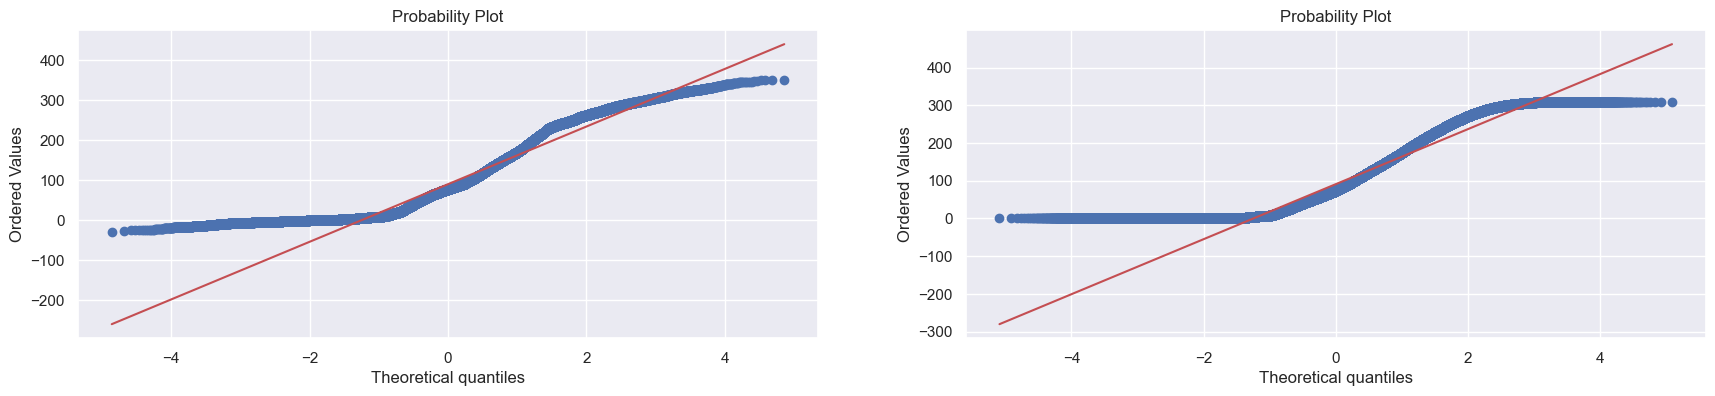

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(21, 4))

res1 = stats.probplot(pd.DataFrame(prediction, columns=['time'])['time'], plot=ax[0])
res = stats.probplot(df_.y, plot=ax[1])
plt.show()

In [ ]:
print(df_.y.isnull().any()) # all target values is filled
(mu, sigma) = norm.fit(df_.y) # get the fitted parameters used by the function
print(f'mu = {mu:.2f} and sigma = {sigma:.2f}')

False
mu = 90.86 and sigma = 75.94


C:\Users\Daniil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


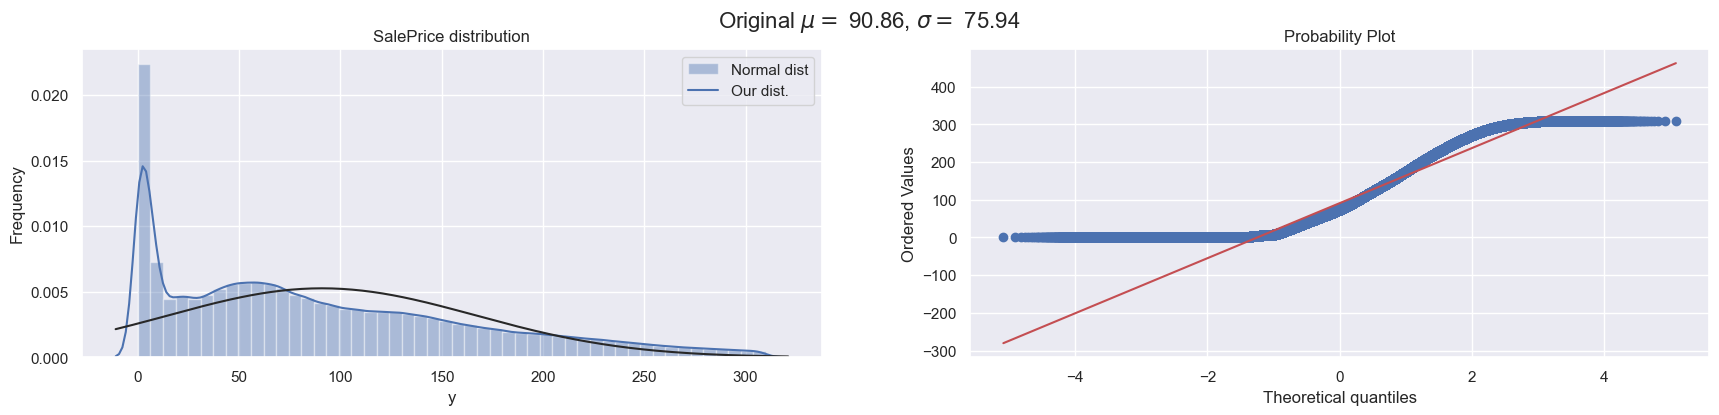

In [ ]:
y = df_.y
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(21, 4))
fig.suptitle(f'Original $\mu=$ {mu:.2f}, $\sigma=$ {sigma:.2f}', fontsize=16)
sns.distplot(y, fit=norm, ax=ax[0], label = 'asdasdasdasd')
ax[0].set_title('SalePrice distribution')
ax[0].set_ylabel('Frequency')
ax[0].legend(labels=['Normal dist', 'Our dist.'])

res = stats.probplot(y, plot=ax[1])
plt.show()

-------------

In [ ]:
PATH = r"C:\Users\Daniil\Desktop\Jupiter\data\public_data_task_1\public_data\df_test.parquet"
df_test = pd.read_parquet(PATH)

In [ ]:
df_test = df_test.drop(['date_depart_year', 'date_depart_week', 'date_depart_hour'], axis=1)

SCORE 62.818336771337

In [ ]:
%%time
prediction = model.predict(df_test)

Wall time: 8.28 s


In [ ]:
(pd.DataFrame(prediction, columns=['time']).sort_values(by='time').round(4) < 0).sum() / len(prediction) * 100

time    3.807244
dtype: float64

In [ ]:
pd.DataFrame(prediction, columns=['time']).abs().round(4).to_csv('sub_example.csv', index=False)

1182903

In [ ]:
piv_ = df.pivot_table(index=['st_code_snd', 'st_code_rsv',
                              'snd_roadid', 'rsv_roadid',
                              'date_depart_month', 'is_load'], values='y', aggfunc=[np.std, np.median, 'count'])
piv_ = piv_.reset_index()
piv_.columns = [  'st_code_snd',
                  'st_code_rsv',
                   'snd_roadid',
                   'rsv_roadid',
            'date_depart_month',
                      'is_load',
                          'std',
                       'median',
                       'count ']

piv_['diff'] = (piv_['median'] - piv_['std']).abs() / piv_['median']

piv_.sort_values(by='diff', ascending=False).query('std > 0').head(40)

,st_code_snd,st_code_rsv,snd_roadid,rsv_roadid,date_depart_month,is_load,std,median,count,diff
288114,railwaypgkhack:):)hack,railwaypgkrailwaydigital:)2022,27,27,6,0,498.212155,0.058056,5,8580.644774
63016,hacknewyeardigital:)tutu,hackrailwaydigital:):),27,27,2,0,116.000976,0.031944,3,3630.334889
362387,tuturailwayhappy2022:)hack,tutuwagonpgkhack:)tutu,30,30,2,0,306.823178,0.100000,3,3067.231781
121352,happyrailwaytutu:)pgk,newyearwagonhappy2022:)pgk,27,27,5,0,55.610538,0.018333,3,3032.302094
36903,2022wagondigital:)digital,hackrailwaydigital:):),32,32,12,0,71.125143,0.028611,3,2484.927327
118184,happyrailwaynewyear:)tutu,happyrailwaytutu:)pgk,0,0,11,0,118.280475,0.048472,60,2439.170256
142921,newyeardigitalhappypgk:):),newyearwagonpgkhack:)newyear,27,27,7,0,203.325686,0.083333,3,2438.908231
335834,tutunewyear:)pgk:):),newyearnewyear2022wagon:)happy,27,27,5,0,66.339711,0.028333,3,2340.401565
359984,tuturailwaydigital2022:)digital,newyearnewyearnewyearrailway:)pgk,27,27,6,0,91.957544,0.042778,3,2148.656880
251271,railwaydigitalnewyear:):)digital,railwaydigitalhappyhappy:)hack,27,27,11,0,93.077444,0.043889,3,2119.751886


![image.png](attachment:image.png)

C:\Users\Daniil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y'>

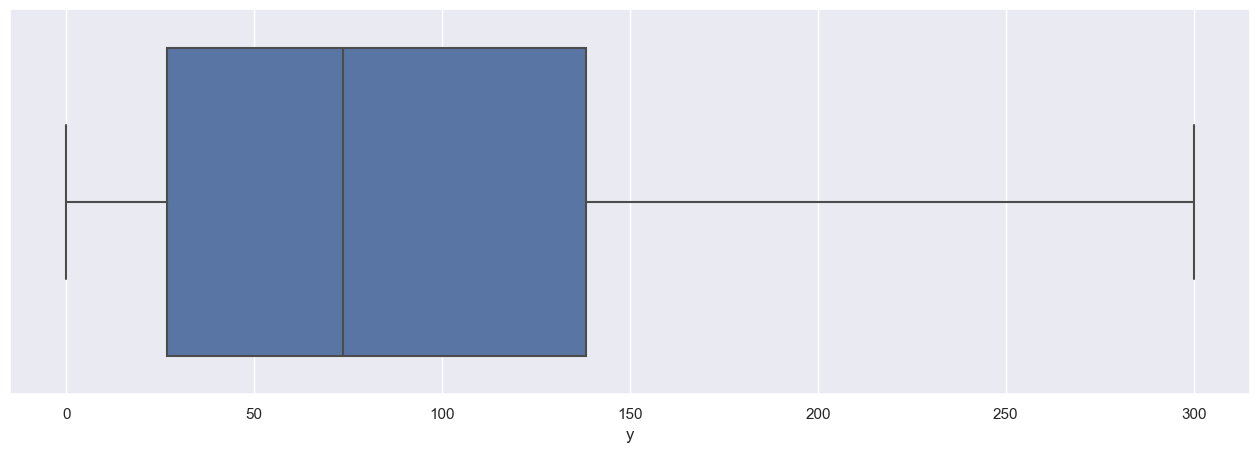

In [ ]:
sns.boxplot(df.query('y < 300').y)

In [ ]:
df.query('y > 500')

,st_code_snd,st_code_rsv,date_depart_month,date_depart_day,fr_id,route_type,is_load,rod,common_ch,vidsobst,distance,snd_org_id,rsv_org_id,snd_roadid,rsv_roadid,snd_dp_id,rsv_dp_id,y
16,tutunewyearwagonhack:)happy,newyearwagondigitaltutu:)pgk,2,4,2261.0,4.0,0,9,2.0,111.0,2641.0,2974,3176,0,0,4,75,669.716667
27,newyearwagonpgkhack:)newyear,hacknewyearrailway:)pgk,5,29,725.0,1.0,1,8,9.0,101.0,4820.0,6682,1658,21,21,111,4,653.066667
86,tutudigital2022:):)railway,2022tutunewyear:):)railway,4,12,1642.0,4.0,1,8,9.0,205.0,5431.0,1098,13927,28,28,134,105,548.133333
317,tutuhappy:)digital:)tutu,tutututuhackhack:)hack,2,26,1210.0,4.0,1,2,10.0,102.0,4531.0,1451,10423,27,27,131,120,562.083333
470,wagonrailway:):):)railway,newyear:)newyearhappy:):),3,11,2261.0,4.0,0,2,19.0,102.0,2014.0,2974,1437,1,1,8,26,649.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219041,hack:):)newyear:):),wagontutunewyearrailway:)pgk,11,29,765.0,4.0,1,2,10.0,102.0,4418.0,1979,1098,1,1,8,86,676.450000
4219061,pgkwagonpgk2022:)digital,pgkwagonhackhappy:)2022,1,5,2261.0,1.0,0,8,9.0,102.0,4400.0,2974,3102,6,6,59,111,572.050000
4219151,newyearwagondigitalpgk:)2022,newyearwagonrailwaypgk:)newyear,3,27,2261.0,3.0,0,8,975.0,111.0,4708.0,2974,11480,6,6,135,111,575.700000
4219154,tutupgkdigitalrailway:)hack,tutunewyear2022pgk:)2022,4,14,1677.0,3.0,1,2,19.0,102.0,4340.0,2129,10294,27,27,125,117,831.833333


In [ ]:
df2 = df.query('y < 310')

In [ ]:
# [*best_cor, *['st_code_snd', 'st_code_rsv']]

In [ ]:
%%time
df_ = df2[[*best_cor, *['st_code_snd', 'st_code_rsv']]].sample(frac=1., random_state=0)
df_train = df_.iloc[: 2 * len(df) // 3]
df_test = df_.iloc[2 * len(df) // 3 :]
train_pool = Pool(df_train.drop(['y'], 1),
                  label=df_train.y, cat_features=['st_code_snd', 'st_code_rsv']
                  )
test_pool = Pool(df_test.drop(['y'], 1),
                 label=df_test.y, cat_features=['st_code_snd', 'st_code_rsv']
                 )

<timed exec>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
<timed exec>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


Wall time: 3.33 s


In [ ]:
model = CatBoostRegressor(custom_metric= ['R2', 'RMSE'], learning_rate=0.1, n_estimators=105)
model.fit(train_pool, eval_set=test_pool, verbose=40, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 71.0682654	test: 71.0435656	best: 71.0435656 (0)	total: 326ms	remaining: 33.9s
40:	learn: 39.5627201	test: 39.5815168	best: 39.5815168 (40)	total: 11s	remaining: 17.2s
80:	learn: 38.3315210	test: 38.3573906	best: 38.3573906 (80)	total: 21.1s	remaining: 6.26s
104:	learn: 37.8846734	test: 37.9108378	best: 37.9108378 (104)	total: 27.2s	remaining: 0us

bestTest = 37.91083785
bestIteration = 104



In [ ]:
df

,st_code_snd,st_code_rsv,date_depart_month,date_depart_day,fr_id,route_type,is_load,rod,common_ch,vidsobst,distance,snd_org_id,rsv_org_id,snd_roadid,rsv_roadid,snd_dp_id,rsv_dp_id,y
0,wagonwagonwagontutu:)wagon,wagondigitalnewyearrailway:)happy,11,12,3399.0,4.0,1,2,11.0,102.0,930.0,1098,5476,13,13,78,75,185.200000
1,railwaypgkhappyrailway:)railway,digitalhappynewyeardigital:)wagon,4,17,2261.0,3.0,0,8,9.0,111.0,16.0,2974,6682,21,21,111,111,0.250000
2,railwaytutupgkpgk:)digital,pgkdigitalrailway:):)happy,5,2,1089.0,3.0,1,8,9.0,111.0,879.0,2082,10729,9,9,67,23,109.133333
3,tuturailwaydigital2022:)digital,newyearnewyear20222022:)2022,11,17,2261.0,4.0,0,8,975.0,103.0,8569.0,2974,10571,28,28,115,112,214.093056
4,railwaytutupgkpgk:)digital,pgkhappyrailwayhack:)railway,12,25,1666.0,4.0,1,8,9.0,101.0,656.0,2082,9225,9,9,67,16,104.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219365,tutunewyearwagonhack:)happy,newyearwagondigitaltutu:)pgk,12,8,2261.0,4.0,0,2,19.0,102.0,1177.0,2974,1424,6,6,129,70,112.233333
4219366,happy:)pgkrailway:)2022,railwaypgkrailwaydigital:)2022,1,5,1666.0,4.0,1,8,9.0,102.0,2078.0,1290,10282,32,32,29,59,115.816667
4219367,wagonwagon2022newyear:)railway,newyearwagondigital2022:)railway,5,31,2261.0,3.0,0,8,9.0,101.0,5336.0,1098,2942,13,13,77,111,190.718889
4219368,newyearwagonhappytutu:)2022,newyearwagonpgkhack:)newyear,3,24,2261.0,3.0,0,8,9.0,101.0,1886.0,2974,3107,32,32,29,31,49.583333
